# Introduction

#### In today’s highly competitive business environment, data has become a strategic asset for organizations seeking to improve performance and sustain growth. Advances in data collection, storage, and analytics have enabled businesses to transform large volumes of operational data into actionable insights that support informed decision-making. Organizations that effectively leverage analytics are better positioned to optimize operations, understand customer behavior, and drive profitability.

#### Retail businesses, in particular, operate in data-rich environments where insights derived from sales and customer data can directly influence pricing strategies, inventory management, and marketing effectiveness. This report presents an exploratory data analysis (EDA) of Superstore sales data, a fictitious retail dataset designed to closely reflect real-world retail operations. The analysis focuses on identifying key trends, performance drivers, and profitability patterns to support strategic planning and enhance business decision-making.

># This analysis seeks to address the following key business questions:
>
> * Sales Performance: What are the overall sales trends over time, and are there notable fluctuations that require management attention?
> * Product Category Performance: Which product categories contribute most to total sales, and which categories are underperforming?
> * Geographic Insights: How does sales performance vary across regions, and which markets present growth opportunities or require targeted marketing efforts?
> * Profitability: Which products generate the highest profitability, which are underperforming, and what factors influence overall profit performance during the period analyzed?
> * In addition to answering these questions, the analysis aims to uncover additional insights that may inform strategic and operational decisions. The ultimate objective is to translate data-driven findings into actionable recommendations that support improved decision-making and enhance overall business performance.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [3]:
df = pd.read_csv('Superstore.csv', encoding='latin1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2011-110422,22-01-2011,24-01-2011,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2014-121258,27-02-2014,04-03-2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2014-121258,27-02-2014,04-03-2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2014-121258,27-02-2014,04-03-2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

> # UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0
> * Means that pandas is trying to read the file using UTF-8 encoding, but the CSV file was saved using a different character encoding (often Windows-1252 or Latin-1). 
> * The byte 0xa0 is a non-breaking space character that UTF-8 can’t interpret in this context.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

The dataset contains 9994 records (rows) and 21 features (columns). Among the features, 2 have datetime data type (date), 3 are floating point (decimals), 3 are integers (whole numbers), and 13 are object (strings) data types. It also has no missing values.

## 2. Data Preprocessing

In [20]:
df = df.drop('Row ID',axis=1)

In [21]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='mixed', dayfirst=True)

In [22]:
df[['Order Date', 'Ship Date']].isna().sum()

Order Date    0
Ship Date     0
dtype: int64

> # ValueError: time data "13-06-2013" doesn't match format "%m-%d-%Y"
>
>This means your date column contains mixed date formats.
> * "13-06-2013" → day-month-year
> * Other rows are likely "06-13-2013" → month-day-year
> * Since 13 cannot be a month, pandas fails when it assumes %m-%d-%Y.
>
>Why this happens (Superstore-specific)
>Some versions of the Superstore dataset contain inconsistent date formats due to:
> * Different regional exports
> * Manual data edits
> * Excel saving dates differently

In [26]:
# feature engineering, extracts specific date values from the `Order Date` column, creates new features from existing features
df['month'] = df['Order Date'].dt.month 
df['year'] = df['Order Date'].dt.year
df['year_month'] = df['Order Date'].dt.to_period('M')
df['total_discount_in_dollars'] = df['Sales'] * df['Discount'] # discount's equivalent to dollars
df['selling_price'] = df['Sales'] / df['Quantity'] # calculates selling price for the each product
df['(net)_profit_before_discount'] = df['Sales'] * df['Discount'] + df['Profit'] # net profit before deducting discount
df['order_fulfillment_time'] = df['Ship Date'] - df['Order Date'] # interval between order placed and order shipped
df['net_profit_per_unit_sold'] = df['Profit'] / df['Quantity'] # net profit generated per unit sold
df=df.rename(columns = {'Profit':'net_profit'}) # renames Profit column with net_profit, a more specific name
df['profit_margin'] = df['net_profit'] / df['Sales'] * 100 # for a 25% profit margin, the company makes .25 dollars per 1 dollar sale
df['discounted_sales'] = df['Sales'] - (df['Discount']*df['Sales']) # extracts sales accounted for discount

In [27]:
df.head().T

,0,1,2,3,4
Order ID,CA-2013-152156,CA-2013-152156,CA-2013-138688,US-2012-108966,US-2012-108966
Order Date,2013-11-09 00:00:00,2013-11-09 00:00:00,2013-06-13 00:00:00,2012-10-11 00:00:00,2012-10-11 00:00:00
Ship Date,2013-11-12 00:00:00,2013-11-12 00:00:00,2013-06-17 00:00:00,2012-10-18 00:00:00,2012-10-18 00:00:00
Ship Mode,Second Class,Second Class,Second Class,Standard Class,Standard Class
Customer ID,CG-12520,CG-12520,DV-13045,SO-20335,SO-20335
Customer Name,Claire Gute,Claire Gute,Darrin Van Huff,Sean O'Donnell,Sean O'Donnell
Segment,Consumer,Consumer,Corporate,Consumer,Consumer
Country,United States,United States,United States,United States,United States
City,Henderson,Henderson,Los Angeles,Fort Lauderdale,Fort Lauderdale
State,Kentucky,Kentucky,California,Florida,Florida


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   Order ID                      9994 non-null   object         
 1   Order Date                    9994 non-null   datetime64[ns] 
 2   Ship Date                     9994 non-null   datetime64[ns] 
 3   Ship Mode                     9994 non-null   object         
 4   Customer ID                   9994 non-null   object         
 5   Customer Name                 9994 non-null   object         
 6   Segment                       9994 non-null   object         
 7   Country                       9994 non-null   object         
 8   City                          9994 non-null   object         
 9   State                         9994 non-null   object         
 10  Postal Code                   9994 non-null   int64          
 11  Region           

The dataset is now ready for analysis. In real-world business scenarios, data cleaning and transformation are essential steps to ensure the accuracy and reliability of analytical results. These processes typically include handling missing values, converting data to appropriate data types, standardizing or normalizing variables, performing feature engineering, and transforming date-time and string fields.

For this dataset, only minimal data cleaning was required, primarily involving data type conversions and feature creation. With these necessary transformations completed, the dataset is now well-prepared for exploratory data analysis and subsequent business insights.

## 3. Exploratory Data Analysis

In [34]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Order Date,9994,2013-04-30 19:20:02.401441024,2011-01-04 00:00:00,2012-05-23 00:00:00,2013-06-27 00:00:00,2014-05-15 00:00:00,2014-12-31 00:00:00,NaN
Ship Date,9994,2013-05-04 18:20:49.229537792,2011-01-08 00:00:00,2012-05-27 00:00:00,2013-06-30 00:00:00,2014-05-19 00:00:00,2015-01-06 00:00:00,NaN
Postal Code,9994.0,55190.379428,1040.0,23223.0,56430.5,90008.0,99301.0,32063.69335
Sales,9994.0,229.858001,0.444,17.28,54.49,209.94,22638.48,623.245101
Quantity,9994.0,3.789574,1.0,2.0,3.0,5.0,14.0,2.22511
Discount,9994.0,0.156203,0.0,0.0,0.2,0.2,0.8,0.206452
net_profit,9994.0,28.656896,-6599.978,1.72875,8.6665,29.364,8399.976,234.260108
month,9994.0,7.814589,1.0,5.0,9.0,11.0,12.0,3.286047
year,9994.0,2012.722934,2011.0,2012.0,2013.0,2014.0,2014.0,1.124039
total_discount_in_dollars,9994.0,32.27758,0.0,0.0,1.0368,14.8704,11319.24,164.025577


The dataset contains sales data from 2011-01-04 to 2014-12-31. Earliest Ship Date information was in 2011-01-08, while the latest was in 2015-01-06. No apparent errors or anomalies can be observed with the Sales, Quantity, and Discount columns. With net_profit, (net)_profit_before_discount, and net_profit_per_unit_sold, there are negative values as the min, which may mean actual negative profit or possible error. This requires further investigation.

.

##### What are the overall sales trends, and how have they evolved over time? Are there any significant fluctuations that need to be addressed?

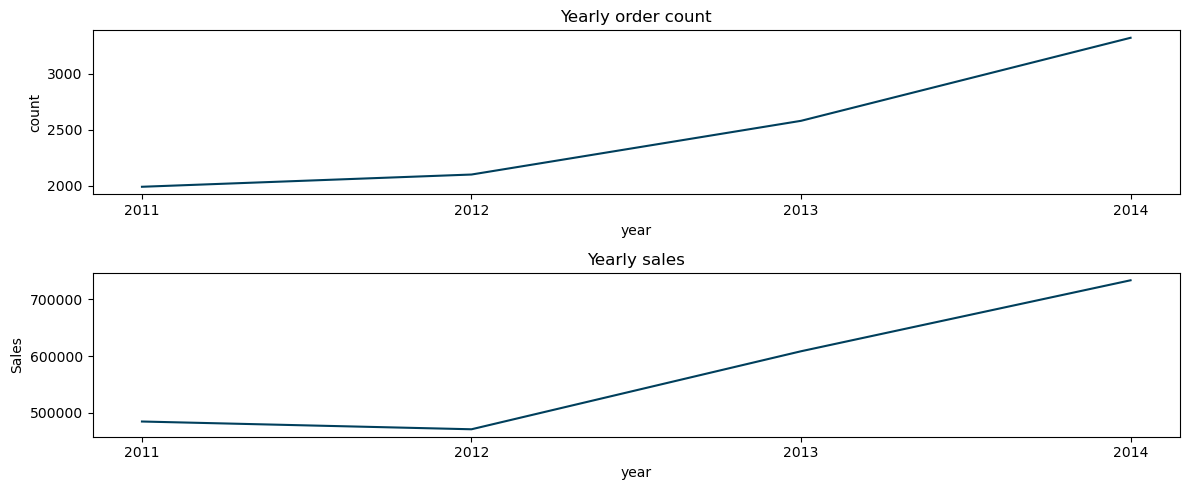

In [38]:
plt.figure(figsize=(12,5))

plt.subplot(211)
df.groupby(['year'])['Order Date'].count().plot(c='#003f5c')
plt.ylabel('count')
plt.xticks(df.groupby(['year'])['Order Date'].count().index)
plt.title('Yearly order count')

plt.subplot(212)
df.groupby('year')['Sales'].sum().plot(c='#003f5c')
plt.ylabel('Sales')
plt.xticks(df.groupby('year')['Sales'].sum().index)
plt.title('Yearly sales')


plt.tight_layout()

In [39]:
print('Annual total sales: ')
df.groupby('year')['Sales'].sum()

Annual total sales: 


year
2011    484247.4981
2012    470532.5090
2013    608473.8300
2014    733947.0232
Name: Sales, dtype: float64

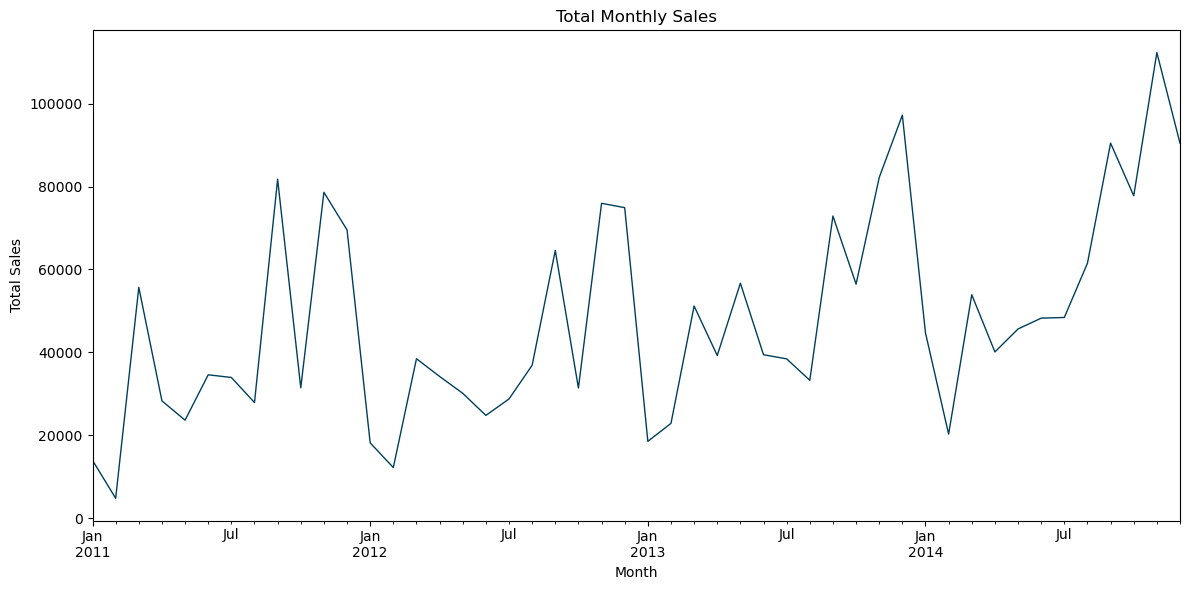

In [40]:
df.groupby('year_month')['Sales'].sum().plot(c='#003f5c',linewidth=1,figsize=(12,6))
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.tight_layout()

Clear seasonal patterns are evident in the Superstore sales data. Sales begin to rise in November and peak in December, reflecting strong year-end demand, before dropping sharply in January. Between February and March, sales recover and increase again. From April through August, sales remain relatively stable each year. Notably, a pronounced decline is consistently observed in October, indicating a sharp seasonal downturn prior to the year-end surge.

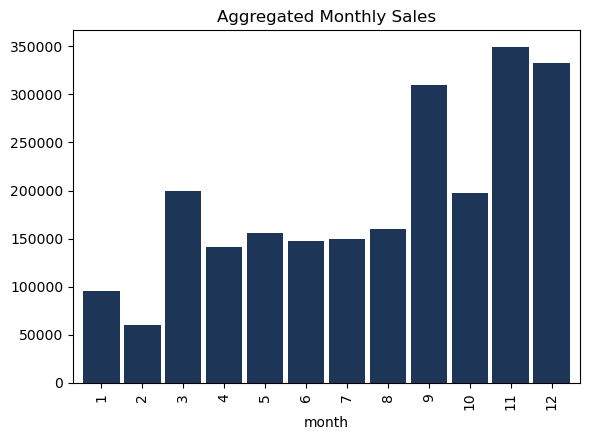

In [43]:
df.groupby('month')['Sales'].sum().plot(kind='bar',color='#1d3557',figsize=(6,4.5),width=.89)
plt.title('Aggregated Monthly Sales')

plt.tight_layout()

The visualization above illustrates total monthly sales aggregated over a four-year period. Overall, sales volumes are higher during the holiday season, reflecting increased consumer spending toward the end of the year. Additionally, the academic calendar in the United States typically begins in late August or early September, which may help explain the noticeable increase in sales during September. This rise is likely driven by demand for school-related products such as binders, paper, home and office supplies, bookcases, and related accessories.

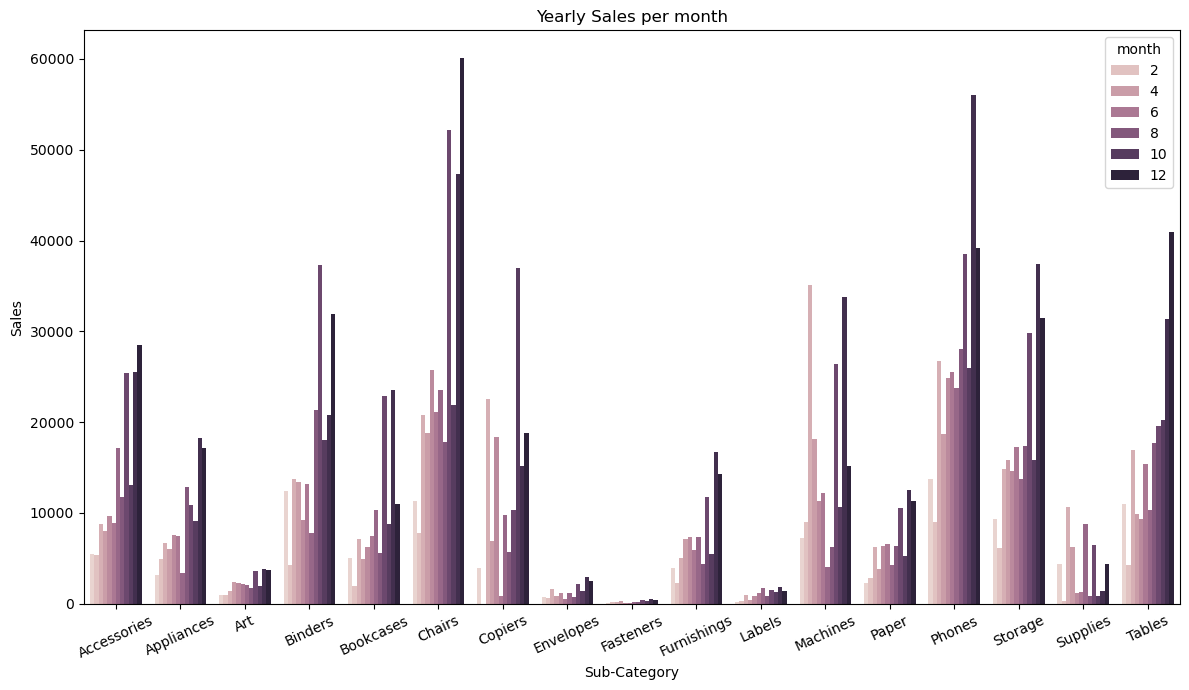

In [45]:
month_subcat=pd.DataFrame(df.groupby(['month','Sub-Category'])['Sales'].sum().reset_index())
month_subcat

plt.figure(figsize=(12,7))
sns.barplot(data=month_subcat,\
            x='Sub-Category',\
            y='Sales',\
            hue='month')
plt.title('Yearly Sales per month')
plt.xticks(rotation=25)

plt.tight_layout()

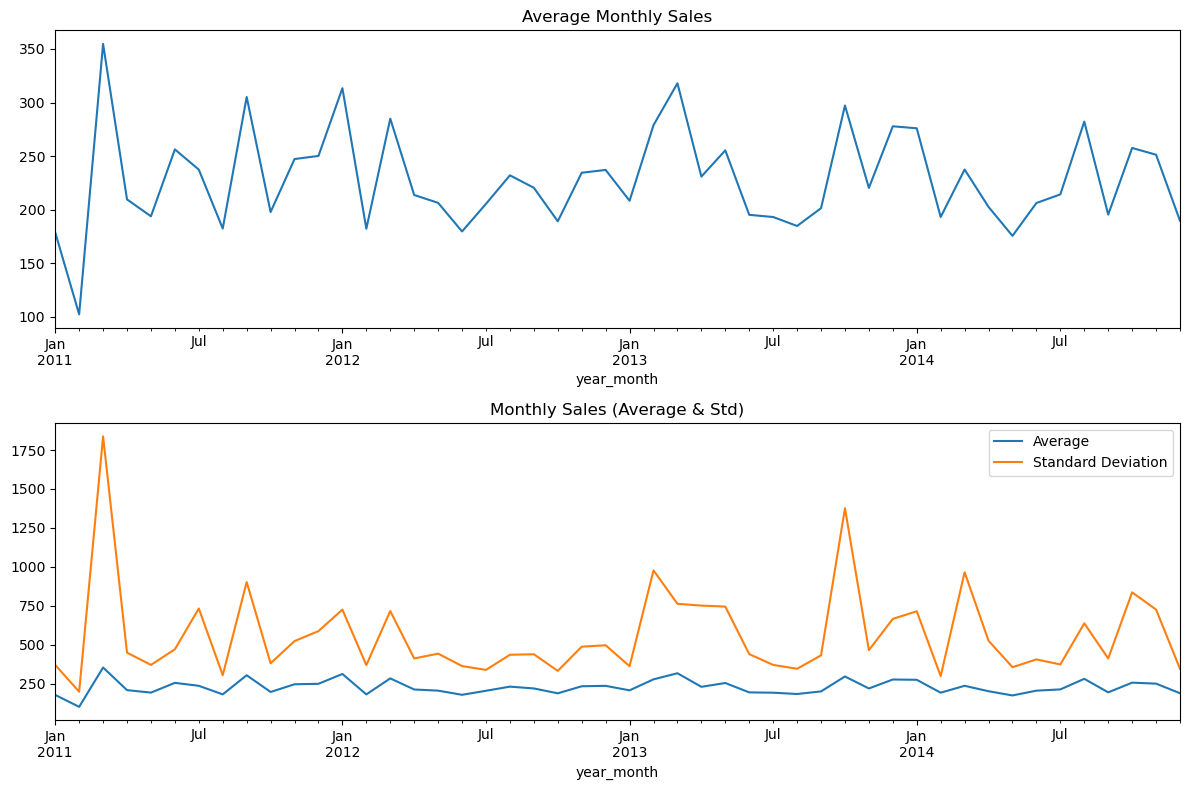

In [46]:
plt.figure(figsize=(12,8))

plt.subplot(211)
df.groupby('year_month')['Sales'].mean().plot()
plt.title('Average Monthly Sales')

plt.subplot(212)
df.groupby('year_month')['Sales'].mean().plot()
df.groupby('year_month')['Sales'].describe()['std'].plot()
plt.title('Monthly Sales (Average & Std)')
plt.legend(['Average','Standard Deviation'])

plt.tight_layout()
plt.show()

> ##### Key findings:
>
> * Substantial intra-month sales variability is evident across the observed period, as quantified by the monthly sales standard deviation. This variability is not random but exhibits recurring temporal patterns. Specifically, sales volatility is elevated in March and again during September and October, suggesting periods of heightened demand uncertainty or promotional activity.
>
> * In contrast, from April 2012 through year-end, sales display relatively low variability, indicating a more stable revenue environment. This period aligns with a modest decline in overall annual sales performance, as total yearly sales decreased slightly from 2011 to 2012. Conversely, higher sales volatility is observed in 2011, 2013, and 2014, reflecting greater fluctuations in customer demand and sales performance during those years.
>
> * Overall, retail sales variability is influenced by multiple structural and market-driven factors, including seasonality, shifts in consumer purchasing behavior, promotional cycles, and competitive dynamics, all of which have direct implications for demand forecasting, inventory planning, and revenue management.

##### Which product categories contributed the most to the company's sales? Which categories are underperforming, if any?

Text(0.5, 1.0, 'Total Sales per Sub-Category')

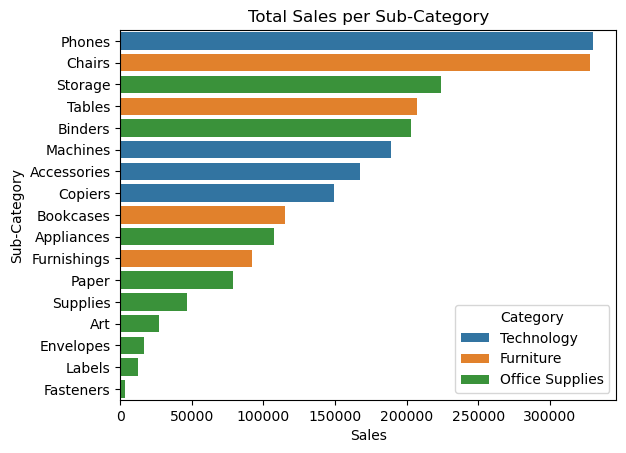

In [50]:
df_sales = pd.DataFrame(df.groupby(['Category','Sub-Category'])['Sales'].sum()).reset_index().sort_values('Sales',ascending=False)

sns.barplot(x='Sales',y='Sub-Category',data=df_sales,hue='Category')
plt.title('Total Sales per Sub-Category')

The visualization provides an aggregate view of sales magnitude across product sub-categories over the four-year period from 2011 to 2014. Within the Technology category, Phones are the highest revenue-generating sub-category. Similarly, Chairs dominate sales within the Furniture category, while Storage leads in the Office Supplies category. Collectively, Phones, Chairs, and Storage consistently rank as the top three revenue-generating sub-categories throughout the period, followed by Tables, Binders, and Machines.

Conversely, Copiers represent the lowest-performing sub-category within Technology, while Furnishings and Fasteners generate the least sales within the Furniture and Office Supplies categories, respectively.

Notably, the sub-categories with the highest sales—Phones and Chairs—belong to the Technology and Furniture categories, which typically comprise higher-priced items. This suggests that overall revenue is significantly driven by high-ticket products, highlighting the importance of pricing strategy, demand management, and inventory optimization within these categories.

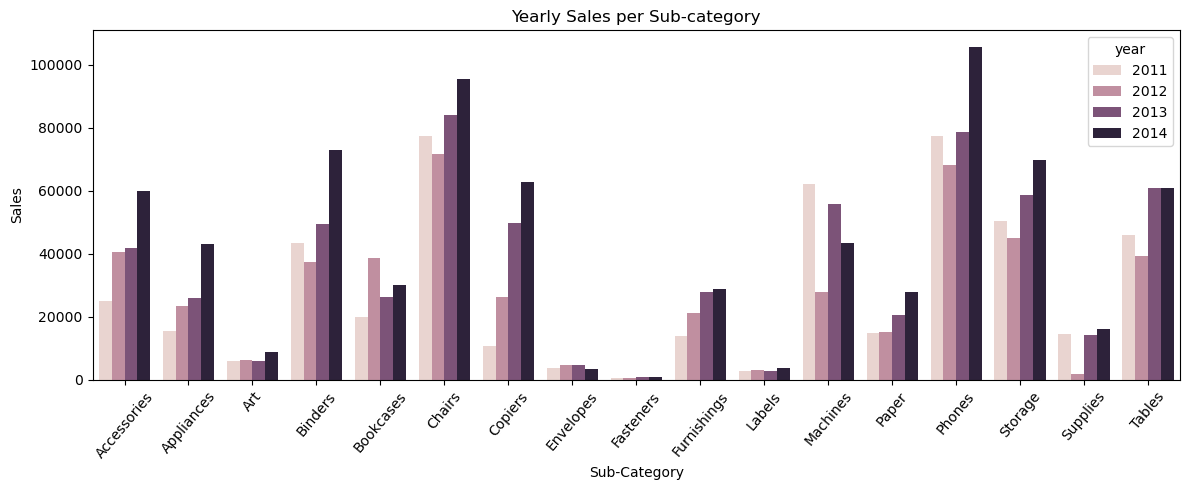

In [89]:
plt.figure(figsize=(12,5))
sns.barplot(
    data=yearly_sales,
    x='Sub-Category',
    y='Sales',
    hue='year',
)

plt.xticks(rotation=50)
plt.title('Yearly Sales per Sub-category')
plt.tight_layout()
plt.show()

In [87]:
yearly_sales=pd.DataFrame(df.groupby(['Sub-Category','year'])['Sales'].sum()).reset_index()
yearly_sales['yearly_growth_rate'] = yearly_sales.groupby('Sub-Category')['Sales'].pct_change() * 100
print('Sales Annual Average Growth Rate:')
pd.DataFrame(yearly_sales.groupby('Sub-Category')['yearly_growth_rate'].mean().sort_values(ascending=False))

Sales Annual Average Growth Rate:


,yearly_growth_rate
Sub-Category,
Supplies,185.742343
Copiers,85.854740
Appliances,42.879917
Accessories,36.157557
Furnishings,29.479289
Bookcases,24.934417
Paper,24.118681
Binders,21.913015
Art,16.183280


Based on average annual sales growth rates, Envelope products exhibited the slowest growth over the period. In contrast, Supplies recorded the highest growth, achieving an average annual growth rate (AAGR) of 185%. This was followed by Copiers and Appliances, which posted strong growth rates of 86% and 43% AAGR, respectively, indicating rapid expansion within these sub-categories.

>##### Key Findings
>
> * Sales Contribution by Sub-Category: Over the four-year period, Phones generated the highest sales within the Technology category, Chairs within Furniture, and Storage within Office Supplies. These leading sub-categories were followed by Tables, Binders, and Machines. Conversely, Copiers, Furnishings, and Fasteners were the lowest revenue-generating sub-categories within the Technology, Furniture, and Office Supplies categories, respectively.
>
> * Year-over-Year Sales Variability: Annual sales performance varied across all product sub-categories, with no consistent growth pattern observed over time. For Phones, Binders, Appliances, and Accessories, the highest sales growth occurred in 2014, whereas Copiers, Machines, and Tables experienced their peak growth in 2013.
>
> * Average Annual Growth Performance: Based on average annual sales growth rates, Supplies, Copiers, and Appliances emerged as the fastest-growing sub-categories. In contrast, Envelopes, Chairs, and Machines recorded the slowest average growth, indicating relatively mature or stagnant demand in these segments.

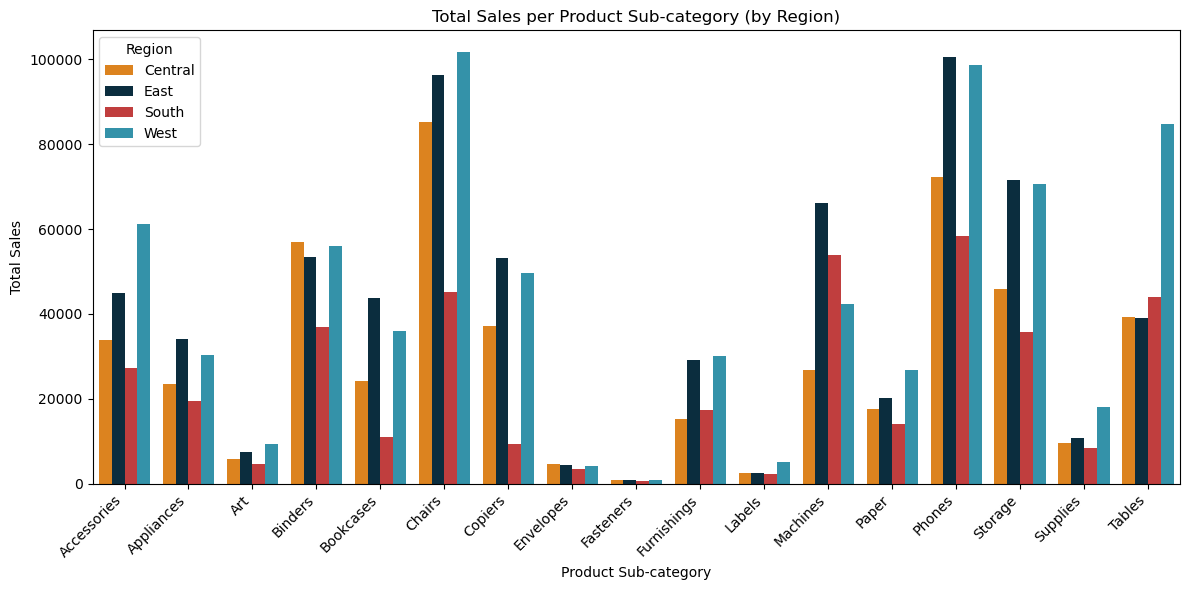

In [91]:
reg_sub=pd.DataFrame(df.groupby(['Region','Sub-Category'])['Sales'].sum()).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=reg_sub, x='Sub-Category', y='Sales', hue='Region',palette=['#fb8500','#023047','#d62828','#219ebc'])
plt.xlabel('Product Sub-category')
plt.ylabel('Total Sales')
plt.title('Total Sales per Product Sub-category (by Region)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.tight_layout()

Sales across most sub-categories are notably lower in the South and consistently higher in the West. For several products, this disparity is particularly pronounced. For example, sales of chairs and copiers in the South are significantly lower compared to all other regions. In contrast, machines and tables exhibit higher sales in the South than in other regions, making them clear exceptions to the general regional trend.

For most sub-categories, sales in the Central region are only marginally higher than those in the South, suggesting relatively similar demand levels between these two regions. Another prominent pattern is that certain product sub-categories record substantially higher sales in the West compared to all remaining regions. These include tables, office supplies, and technology accessories, indicating strong demand concentration in the West.

Although the dataset is fictional and does not provide contextual information about the regions, sales patterns allow for reasonable hypotheses. The higher sales observed in the West and East may suggest a greater presence of offices, corporate environments, or business districts in these regions. Supporting this assumption, sales of office-related products—such as storage, binders, and appliances—are significantly lower in the South and Central regions, while demand for these items is considerably higher in the West and East. Despite this trend, it is worth noting that the South records the second-highest sales for machines, indicating a possible regional specialization or localized demand for this product category.

It is important to emphasize that these figures represent total aggregated sales from 2011 to 2014 and do not capture year-over-year fluctuations or temporal trends. Consequently, this visualization serves as a high-level comparison of sales magnitude across regions and product sub-categories rather than an analysis of sales performance over time.

Text(0.5, 1.0, 'Yearly sales per region')

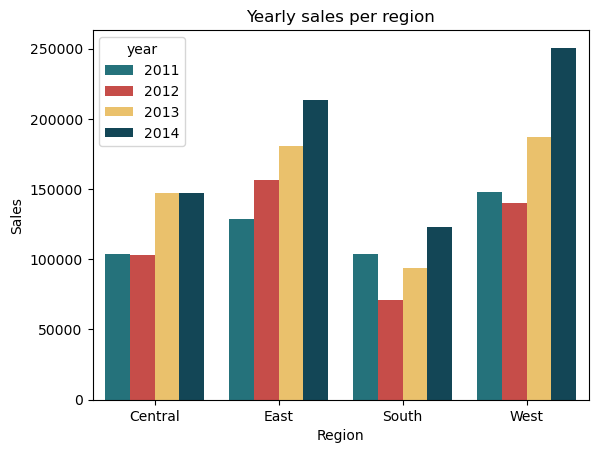

In [94]:
year_s=pd.DataFrame(df.groupby(['Region','year'])['Sales'].sum()).reset_index()
year_p=pd.DataFrame(df.groupby(['Region','year'])['(net)_profit_before_discount'].sum()).reset_index()

sns.barplot(data=year_s,x='Region',y='Sales',hue='year',palette=['#177e89','#db3a34','#ffc857','#084c61'])
plt.title('Yearly sales per region')

The visualization illustrates how regional sales evolved over time. In the Central region, sales remained relatively stable initially before experiencing a sharp upward trend beginning in 2013. The East region demonstrated consistent year-over-year growth throughout the entire period, indicating steady demand and resilience to broader market fluctuations.

In contrast, the South region experienced a decline in sales in 2012, followed by a clear recovery and sustained positive growth in subsequent years. A similar pattern is observed in the West, where sales also dipped in 2012 but rebounded strongly thereafter, maintaining positive growth for the remainder of the period.

Overall, a slight decline in total sales is evident in 2012. From the regional trends, it can be inferred that the South contributed most significantly to this downturn, followed by the West and then the Central region. Notably, despite the overall dip, the East continued to grow positively in 2012, highlighting its relative stability compared to the other regions.

In [97]:
year_s['yearly_growth_rate']=year_s.groupby('Region')['Sales'].pct_change() * 100
pd.DataFrame(year_s.groupby('Region')['yearly_growth_rate'].mean())

,yearly_growth_rate
Region,
Central,14.052441
East,18.361897
South,10.423004
West,20.759458


Using the Sales Average Annual Growth Rate (AAGR) of each region for the 4-year period, we see that the West had been the fastest growing Region in terms of sales, followed by the East, and then the Central region, and then South. Fruther investigation can be done to understand possible factors that may affect the differences which include economic factor, market conditions (saturation), consumer preference, among others.

Average Annual Growth Rate (AAGR) is calculated by getting the arithmetic mean of the yearly growth rates

> ##### Key Findings:
>
> * A clear seasonal pattern is evident across all regions. Sales generally increase toward the end of the year, with pronounced peaks in November and December. A notable surge also occurs in September, which may be associated with the start of the academic year. This interpretation is supported by increased sales of school-related products and a rise in sales within the consumer segment during this month.
>
> * Across most months, the West consistently records the highest sales, followed by the East, while the Central and South regions trail behind. Sales in the South remain the lowest for most of the year, with one notable exception in March 2011, when South sales were more than three times higher than the next-best performing region, indicating a possible one-time event or anomaly.
>
> * In terms of product sub-categories, sales are generally lower in the South and higher in the West. Specifically, office supplies and technology products show stronger performance in the West and East, whereas tables and machines record higher sales in the South. The Central region exhibits relatively stable and consistent sales across most sub-categories. For certain office supply items—such as art supplies, envelopes, fasteners, and labels—sales levels are broadly comparable across all regions, suggesting uniform demand.
>
> * Regarding growth trends, all regions experienced negative growth in 2012, with the exception of the Central region, which maintained positive growth during that year. Based on Average Annual Growth Rate (AAGR), the West emerges as the fastest-growing region, followed by the East, then the Central, and finally the South. While the Central region demonstrates moderate and stable growth, its performance lags behind the stronger expansion observed in the West and East.

##### Which products are more profitable and which were not? With the available data, what factors affected the company's profit? How is the company's profitability during the period?

In [103]:
yearly_summary = df.groupby('year')[['Sales','net_profit']].sum()

yearly_summary['profit_margin'] = (yearly_summary['net_profit'] / yearly_summary['Sales']) * 100
yearly_summary

,Sales,net_profit,profit_margin
year,,,
2011,484247.4981,49543.9741,10.231126
2012,470532.5090,61618.6037,13.095504
2013,608473.8300,81726.9308,13.431462
2014,733947.0232,93507.5131,12.740363


Using profit margin as the primary measure of profitability, the company recorded its lowest performance in 2011, with a margin of 10.23%. Profitability improved markedly in 2012, rising to 13.10%, and continued to increase in 2013, when the company achieved its highest profit margin of 13.43%. However, this upward trend did not persist. In 2014, the company experienced a slowdown, with profit margin declining to 12.74%, falling below the 2012 level though remaining higher than in 2011.

Although profit margin is a useful indicator of financial performance, it does not provide a complete picture on its own. Ideally, a more comprehensive analysis would incorporate additional financial metrics such as Cost of Goods Sold (COGS), operating income, and shareholders’ equity. However, because the dataset primarily contains sales-related information and lacks detailed cost and financial structure data, profit margin serves as the most appropriate and consistent metric for evaluating profitability within the scope of this analysis.

In [107]:
profit_margin_df=pd.DataFrame(df.groupby(['Category','Sub-Category'])['profit_margin'].mean()).reset_index()
profit_margin_df

,Category,Sub-Category,profit_margin
0,Furniture,Bookcases,-12.664007
1,Furniture,Chairs,4.389963
2,Furniture,Furnishings,13.706635
3,Furniture,Tables,-14.772653
4,Office Supplies,Appliances,-15.686934
5,Office Supplies,Art,25.164573
6,Office Supplies,Binders,-19.959510
7,Office Supplies,Envelopes,42.313976
8,Office Supplies,Fasteners,29.917051
9,Office Supplies,Labels,42.966346


<Axes: title={'center': 'Furnitures average profit margin'}, ylabel='Sub-Category'>

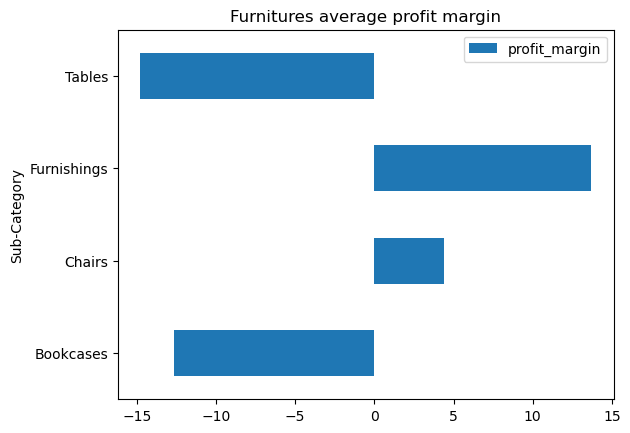

In [120]:
bar1=profit_margin_df[profit_margin_df['Category']=='Furniture'][['Sub-Category','profit_margin']].set_index('Sub-Category')
bar1.plot(kind='barh',title='Furnitures average profit margin')

For furnitures products, furnishings products, on average, are the most profitable followed by chairs products. On the other hand, the company was operating at a loss on tables and bookcases products. Assuming similar sales, loss on tables are higher than gains on furnishings.

<Axes: title={'center': 'Technology average profit margin'}, ylabel='Sub-Category'>

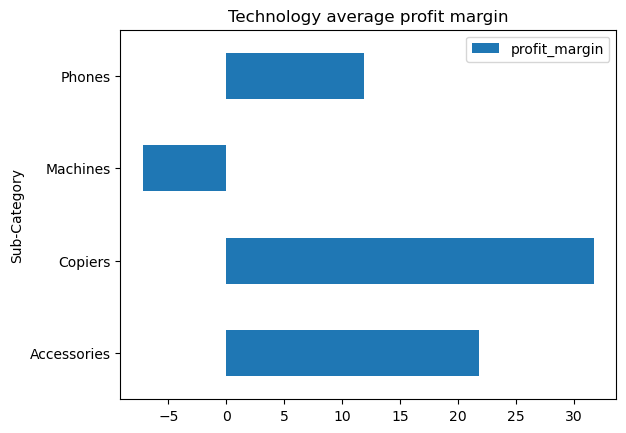

In [118]:
bar2=profit_margin_df[profit_margin_df['Category']=='Technology'][['Sub-Category','profit_margin']].set_index('Sub-Category')
bar2.plot(kind='barh',title='Technology average profit margin')

<Axes: title={'center': 'Office Supplies average profit margin'}, ylabel='Sub-Category'>

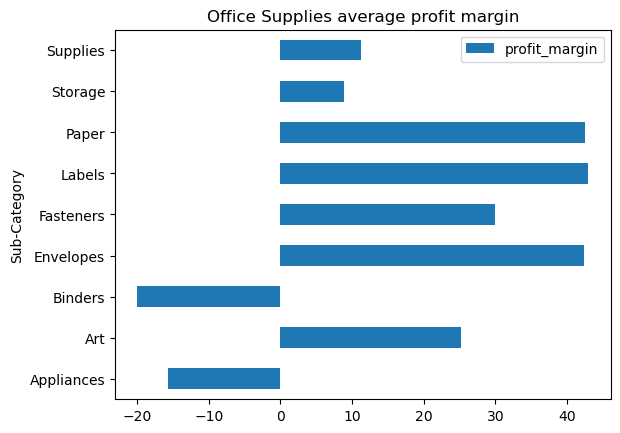

In [116]:
bar3=profit_margin_df[profit_margin_df['Category']=='Office Supplies'][['Sub-Category','profit_margin']].set_index('Sub-Category')
bar3.plot(kind='barh',title='Office Supplies average profit margin')

By product sub-category, phones, chairs, and binders generated the highest total profit within the technology, furniture, and office supplies categories, respectively. These three sub-categories also emerged as the top profit contributors overall, highlighting their central role in the company’s profitability.

At the opposite end, machines, bookcases, and fasteners recorded the lowest total profit within the technology, furniture, and office supplies categories, respectively. Among all sub-categories, fasteners generated the least profit, with a total of only $949, indicating minimal contribution to overall earnings.

When accounting for discounts, profitability declines substantially across nearly all product sub-categories. Most notably, tables experienced a dramatic reversal, with gross profit falling from $26,466 to –$17,725 after discounts—a 167% decrease (1.67×). Bookcases and supplies also shifted from positive to negative profit after discounts were applied. As shown in the accompanying table, profit declined across all sub-categories, with tables showing the largest percentage drop, while labels were the least affected, with an approximate 10% decrease.

These results suggest a need for a comprehensive review of the company’s discounting and promotional strategies, particularly for products where aggressive discounts were not offset by sufficient increases in sales volume.

Finally, it is important to note that the values presented in the visualization represent aggregated totals. As such, they may give the misleading impression that all orders were profitable prior to discounts. In reality, some individual orders may have incurred losses, which were offset by higher profits from other transactions within the same sub-category.

Text(0.5, 1.0, 'Ship Mode (Percent)')

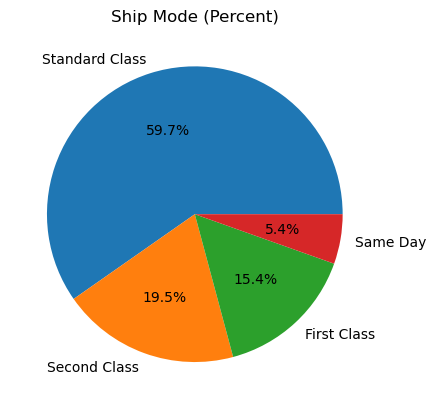

In [131]:
sm=df['Ship Mode'].value_counts()/len(df)*100
plt.pie(i3,labels=sm.index,autopct='%.1f%%',textprops={'fontsize':10})
plt.title('Ship Mode (Percent)')

> # Key Findings
>Summarized below are the key findings from this analysis. Throughout the 4-year period from 2011 to 2014:
>
> Sales Performance
> * Superstore sales increased yearly, with the fastest growth in 2013 and the slowest in 2012.                   
> * Seasonal sales trends was observed, notably in November, December, and September.                   
> * Sales exhibited high variability, particularly in March, September, and October.
>
> Product Categories
> * Phones, chairs, and storage products led in sales by category, while copiers, furnishings, and fasteners performed least.       
> * No clear sales pattern emerged for product sub-categories.                                     
> * Supplies (technology), copiers, and appliances experienced the highest average annual sales growth, while envelopes, chairs, and machine products grew the slowest.                          
>
> Profitability
> * The company maintained a profit margin above 10%, decreasing slightly in 2014.                              
> * Furnishings, copiers, and labels were the most profitable sub-categories, while chairs, phones, and storage products were the least profitable.                                                
> * Phones, chairs, and binders generated the highest total profit, while machines, bookcases, and fasteners generated the least.   
> * Discounts significantly affected profits, with tables, office supplies, and bookcases experiencing the largest drops.         
> * Chairs were highly profitable in the furniture category, with copiers showing impressive profit growth. Machine products, on the other hand, had stagnant growth.                                                                                                                   